<a href="https://colab.research.google.com/github/vbang247/python/blob/main/Technin510_L2_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB2: DATA VISUALIZATION & PROCESSING IN PYTHON
In this lab you will practice Python data processing and visualization.


## Step 1: Access the datasets

In order to streamline grading, we ask that for this and future labs you access your datasets in public urls (urls that exist outside of your session). This allows us to run your code as-is without acquiring login credentials and/or creating local directories 😊

You can access the files for `lab-2` at the following urls:
* Robot faces data set: [robot_faces.csv](https://drive.google.com/open?id=1ggPzwghwNCMz1S5sXlBBmjPUGlqYgI3L)
* Pre-recorded accelerometer data: [accelerometer.csv](https://drive.google.com/open?id=11p6UcZX2jiPO6S8qfxL1uY6ATwJATyq6)

and can incorporate them into your code using the following gists:

```
url_faces = "https://gist.githubusercontent.com/wesleybeckner/70ae15d4143fc01d905c51011ab9c697/raw/6b6ee4ed348f00aee31b4862df8b06bc1b314692/robot_faces.csv"
url_accel = "https://gist.githubusercontent.com/wesleybeckner/a74dacd12b8087c4fc6ab5acc7acf032/raw/480ab2f648036ca562763f42ad68bd0f0db7760e/accelerometer.csv"
```

In [1]:
## SAMPLE CODE
import pandas as pd
url = "https://gist.githubusercontent.com/wesleybeckner/70ae15d4143fc01d905c51011ab9c697/raw/6b6ee4ed348f00aee31b4862df8b06bc1b314692/robot_faces.csv"
url2 = "https://gist.githubusercontent.com/wesleybeckner/a74dacd12b8087c4fc6ab5acc7acf032/raw/480ab2f648036ca562763f42ad68bd0f0db7760e/accelerometer.csv"
faces = pd.read_csv(url)
accel = pd.read_csv(url2)

## Step 2: Robot face data exploration

We started exploring the data in `robot_faces.csv` during class. As a first exercise you will continue this exploration. First, write the code for loading and preprocessing the data like we did in class. After inspecting the different column names to better understand what the data includes, pose a specific question and write new code to answer that question. Some example questions are:
* How many robots both have a mouth and a nose?
* Which country has the highest fraction of robots with black face color?
* Do more robots built after 2012 have blue eyes than those built before?

Your code should print the question at the beginning and print the computed answer at the end. Your script should also create at least one visualization that allows a human to answer the same question without having to do calculations.

*If you are interested, you can read more about the face data [here](https://spectrum.ieee.org/automaton/robotics/humanoids/what-people-see-in-157-robot-faces).* 


In [2]:
faces

,Name,Unnamed: 1,robot type,category,full head,screen type,mouth,nose,eyebrows,cheeks (blush),hair,ears,physical features,robot height,embodiment,face color,face turns other colors,face gradient to,face shape,screen size,head motion,face motion,info display,eye color,eye outline color,eye turns other colors (inside),eye shape,eye turns other shapes (exclude blink),pupil (y/n),pupil color,lid,lid color,iris,iris color,lashes color,lash shape,reflected glare color,# glare circles,blink type,pupil\nshapes,eye motion,pupil and/or\niris motion,glare motion,wink,eye size,eye placement,eye spacing,mouth color (or outline color),mouth inside color,mouth shape,lips,tongue,teeth shape,mouth motion,mouth length,mouth placement,nose color,nose shape,nose 3d,nose size,nose placement,nose motion,eyebrow color,eyebrow shape,eyebrow inner edge positions,eyebrow independent motion,eyebrow motion,eyebrow length,eyebrow arch,cheek color,cheek shape,cheek size,cheek placement,cheek spacing,hair color,country/region of origin,year
0,Vanessa,7,humanoid,service,y,smart,y,y,y,y,y,y,x,low,on mobile platform,beige,x,x,human,small,y,ud,"smart, toolbar[top]",white,black,x,human eye,x,y,black,y,beige,y,blue,black,human,white,1,lid down,circle,none,none,none,no data,small,raise,close,pink,black,human,pink,x,human,"height, width",short,low,beige,human,y,med,cen,none,black,arched (center),"down, flat",x,none,med,med,pink,3D,large,cen,close,black,Russia,2010
1,EDGAR,8,humanoid,research,y,back,y,y,y,y,y,y,x,high,torso (on platform),beige,white,x,human,small,"x,y,z",none,x,brown,x,x,human eye,x,y,no data,y,beige,no data,no data,no data,no data,no data,no data,lid down,circle,none,no data,no data,x,small,raise,medium,beige,black,human,beige,no data,human,"width, height",med,down,beige,human,y,large,down,none,brown,arched (center),down,x,ud,med,small,beige,3D,large,up,wide,brown,Singapore,2014
2,FURo-S,8,humanoid,service,y,blcd,y,y,y,y,y,x,ears,high,full robot body,beige,x,x,rounded rectangle - vert,med,"x, y, vx, vy, vz",none,chest,white,black,x,human eye,x,y,black,y,brown,y,hazel,brown,human,white,1,lid down,circle,none,"lr, ud",none,x,pro,cen,medium,brown,black,"crescent, pucker lips",pink,x,single rect,"height, width",med,cen,beige,rounded pyramid,y,med,cen,none,brown,arched (center),down,y,ud,med,small,pink,blush,x,cen,wide,brown,Korea,2015
3,FURo-D,9,humanoid,service,y,blcd,y,y,y,y,y,x,ears,high,full robot body,beige,x,x,rounded rectangle - vert,med,"x, y, vx, vy, vz",none,chest,white,black,x,human eye,x,y,black,y,brown,y,hazel,brown,human,x,x,lid down,circle,none,"lr, ud",none,x,pro,cen,medium,brown,black,"crescent, pucker lips",pink,x,single rect,"width, height",med,cen,beige,rounded pyramid,y,med,cen,none,brown,arched (center),down,y,ud,med,small,pink,blush,NaN,cen,wide,brown,Korea,2015
4,SociBot,9,humanoid,entertainment,y,back,y,y,y,y,x,x,ears,high,on mobile platform,beige,y,x,human,small,"x, y, z",none,x,white,x,x,human eye,other h. eye shapes,y,black,y,beige,y,"blue, various",black,human,x,x,lid down,circle,none,"up, lr",none,y,pro,raise,medium,pink,dark red,human,pink,pink,human,"height, width",med,down,beige,human,y,small,cen,none,brown,human,"down, flat",y,ud,long,small,peach,3D,med,cen,cen,x,UK,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Baxter (12),51,humanoid,research,x,touch,x,x,x,x,x,x,x,high,torso (on platform),black,x,x,rectangle - horiz,small,"x,y",none,no data,white,x,x,circle,x,y,black,x,x,x,x,x,x,x,x,x,circle,x,x,x,x,pro,up,close,x,x,x,x,x,x,none,x,x,x,x,x,x,x,none,x,x,x,x,none,x,x,x,x,x,x,x,x,USA,2015
132,Eva,51,humanoid,service,x,blcd,y,x,x,x,x,x,x,high,upright mobile cylinder,black,no data,x,oval - horiz,small,no data,no data,x,blue,x,x,horiz oval,no data,x,x,x,x

28


Text(0.5, 1.0, 'How many robots have mouth and nose?')

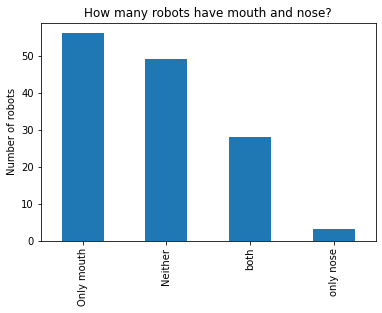

In [3]:
from matplotlib import pyplot as plt

print(len(faces.loc[(faces.loc[:,'mouth'] == 'y') & (faces.loc[:,'nose'] == 'y'), ['mouth', 'nose']]))
fig, ax = plt.subplots()
faces[['mouth','nose']].value_counts().plot(kind='bar')
ax.set_xticklabels(['Only mouth','Neither','both','only nose'])
ax.set_ylabel('Number of robots')
ax.set_xlabel("")
ax.set_title("How many robots have mouth and nose?")

Country with highest fraction of robots with black color is: Canada


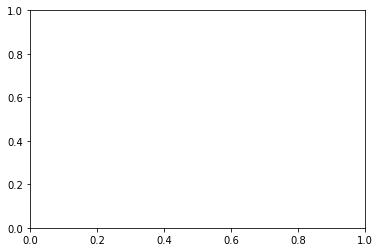

In [4]:
## TODO: Write code to ask a question about the face data and answer it both visually and programmatically
# print(len(faces.loc[(faces.loc[:,'mouth'] == 'y') & (faces.loc[:,'nose'] == 'y'), ['mouth', 'nose']]))
black_robots = faces.groupby('country/region of origin')
country_total = {}

for name, country in black_robots:
  country_total[name] = country.shape[0]
groups_g = black_robots.apply(lambda g: g[g['face color'] == 'black']).reset_index(drop=True).groupby(black_robots.grouper.names)['face color']

# print(country_total)
# print("\n")
country_h, max_h = '',0
for name,g in groups_g:
  if max_h < (g.shape[0] / country_total[name]):
    max_h = (g.shape[0] / country_total[name])
    country_h = name

print("Country with highest fraction of robots with black color is: {}".format(country_h))

fig, ax = plt.subplots()
faces.groupby('country/region of origin')

In [5]:
#Do more robots built after 2012 have blue eyes than those built before?
faces["year"] = faces["year"].apply(pd.to_numeric, errors="coerce").dropna().astype(int)
robots_blue = faces["eye color"] == 'blue'
robots_before2012 = faces["year"] <= 2012
robots_after2012 = faces["year"] > 2012
before_2012 = faces.where(robots_blue & robots_before2012).dropna()
print(before_2012.shape[0])

after_2012 = faces.where(robots_blue & robots_after2012).dropna()
print(after_2012.shape[0])
print("more robots after 2012: number {} have blue eyes".format(after_2012.shape[0]/faces.loc[faces["year"]>2012].shape[0] * 100))
print("more robots before 2012: number {} have blue eyes".format(before_2012.shape[0]/faces.loc[faces["year"]<=2012].shape[0] * 100))

6
19
more robots after 2012: number 20.43010752688172 have blue eyes
more robots before 2012: number 14.285714285714285 have blue eyes


## Step 3: Load and visualize accelerometer data

Next you will explore the accelerometer data in `accelerometer.csv` recorded from a mobile device. 

The first thing your Python script should do is open the data file and parse its content into Python lists or arrays. Each row in the data file corresponds to one reading. The first value is the time in seconds, and the next three values are the x, y, z acceleration values from a mobile device accelerometer. Your goal for this part of the lab is to obtain four lists or arrays (of same length) each containing the different columns in the data file.

You can use the pd.read_csv() that was demonstrated in class, but if you would like to practice string operations from last week, you can open the file, read its content into a single string, and then use the split() function to split into lines (`data_string.split("\n")`) and elements (`data_string.split(",")`).

Before starting to process the data, visualize it to get a better sense of what is in the data. Keep visualization steps in your script for your lab submission.

In [6]:
accel

,0.0,0.03270078029099386,-0.0016577040791511534,0.07040624613463878
0,0.2,-0.113283,-0.038241,0.161607
1,0.4,-0.083617,0.123633,0.129044
2,0.6,-0.091717,0.076735,0.106521
3,0.8,-0.076508,0.070919,0.144249
4,1.0,-0.124198,0.070676,0.106483
...,...,...,...,...
205,41.2,-0.103875,0.103546,0.089788
206,41.4,-0.053300,0.119761,0.112836
207,41.6,-0.084279,0.102456,0.094130
208,41.8,-0.056570,0.139751,0.098174


In [7]:
## TODO: Code for loading and visualizing accelerometer data
import math as m
import numpy as np
time = accel.iloc[:,0].values
x_values = np.array(accel.iloc[:,1].values)
y_values = np.array(accel.iloc[:,2].values)
z_values = np.array(accel.iloc[:,3].values)
idle_time = 0 
count = 0
for i in range(len(time)):
  total_accel = m.sqrt(x_values[i] **2 + y_values[i]**2 + z_values[i]**2)
  if total_accel < 0.2:
    idle_time = idle_time + time[i]

print("percentage of time the device was not moving is {:.2f}".format((np.sqrt(x_values**2 + y_values**2 + z_values**2) < 0.2).sum()*0.2))
print("total amount of time is {:.2f}".format(time[-1]))

percentage of time the device was not moving is 10.40
total amount of time is 42.00


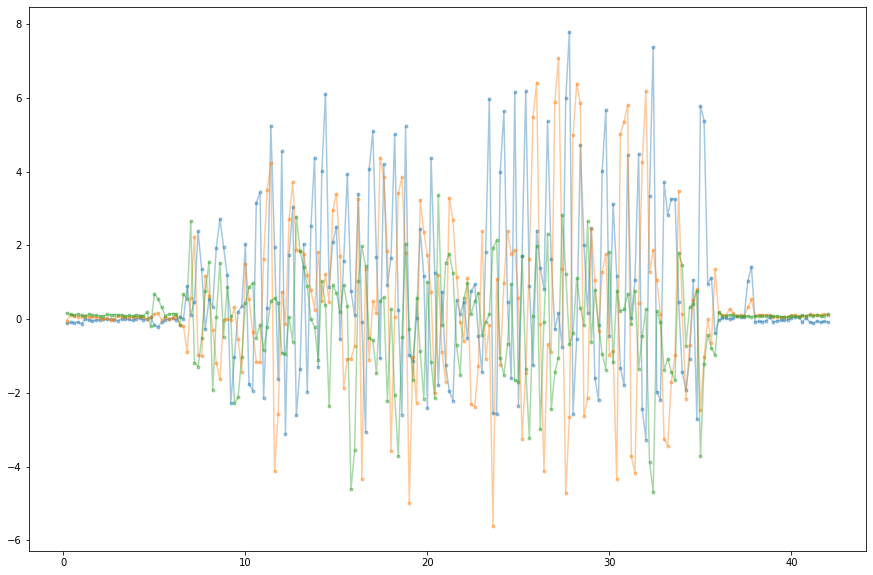

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(time, x_values, ls='-', marker='.', alpha=0.4, label='X')
ax.plot(time, y_values, ls='-', marker='.', alpha=0.4, label='Y')
ax.plot(time, z_values, ls='-', marker='.', alpha=0.4, label='Z')

## Step 4: Detecting lack of movement

As a first data processing exercise, iterate over the lists or arrays you created to compute the (i) total amount of time and (ii) percentage of time during which the person holding the mobile device was not moving (e.g., absolute acceleration smaller than ~0.2m/sec^2). Visualize parts of the data where lack of movement is detected together with the original data to verify that it works correctly.

In [9]:
## TODO: Code for detecting lack of movement (will be run after running code from Step 3)

## Step 5: Counting steps

Next you will iterate over the data to count how many steps were taken. There are alternative ways to do that but here we will outline an approximation of the "zero-crossing" method. Walking with an accelerometer results in cyclic patterns characterized by pairs of peaks and valleys in acceleration in some directions. In the provided data you can focus on the z dimension, since the mobile device was held in fixed orientation. To determine the peaks and valleys, iterate over the z values; compare each element in the list to the value of the previous and the next element (note that you cannot do this for the first and last elements of the list); if it is greater than or smaller than both of those, it corresponds to a peak or a valley. Create a separate list, of same length as the data lists, that has the value +1 where peaks occur, -1 where valleys occur, and 0 otherwise. Visualize the peaks and the valleys on the same plot as your data to verify that your algorithm works correctly.

You will see that even very small variations in acceleration cause peaks and valleys, so we need to be stricter in detecting peaks and valleys that correspond to an actual step. For that, you can extend the condition for peaks and valleys to include a threshold on the absolute value (math.fabs()) of the acceleration in the z direction (e.g., ~1m/sec^2). Visually inspect the number of peaks and valleys with this stricter criteria. 

A rough approximation of the number of steps would be the math.min() of the numbers of peaks and number of valleys. If you are out of time for this lab, you can stop here. However, to count pairs of peaks and valleys more strictly, you need to iterate over the list of peaks and valleys to determine the number of times a peak is followed by a valley (or vice versa) within one second or so (i.e., -1 and 1 separated by no more than four 0s in the peak/valley list). So if you have time, implement counting of pairs as a more accurate approximation of the number of steps. 

Your script should print the counted number of steps on the terminal at the end.

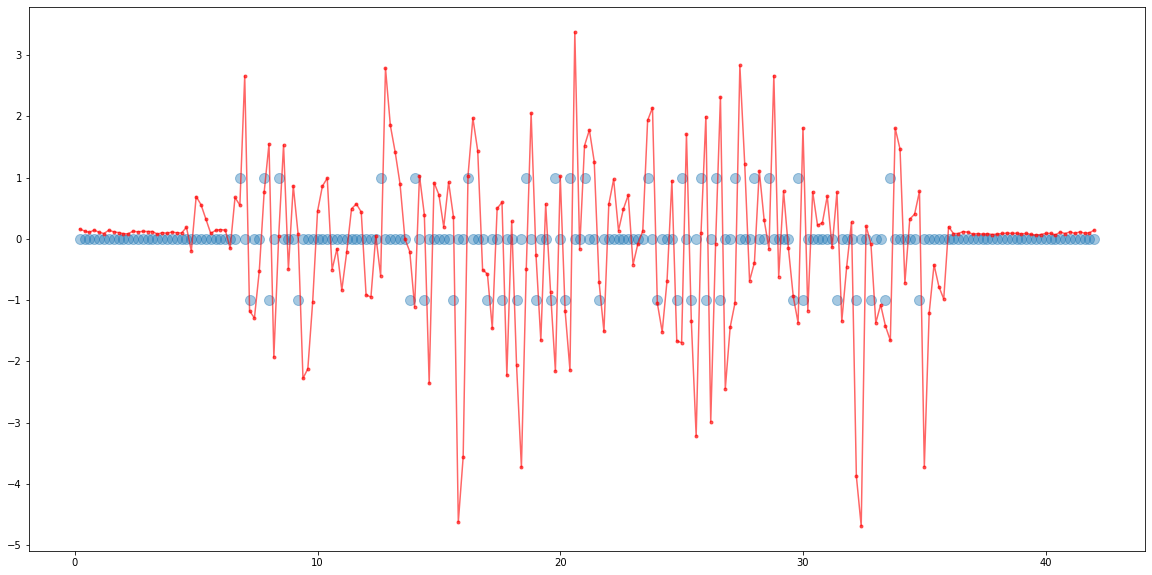

In [10]:
## TODO: Code for counting steps in accelerometer data (will be run after Step 4)
from matplotlib import pyplot as plt
p_v = []
p_v2 = np.zeros(len(time))
for idx,z in enumerate(z_values[1:-1],start=1):
  if (z < -1 and z < z_values[idx-1] and z < z_values[idx+1]):
    p_v2[idx-1] = -1
  elif (z > 1 and z > z_values[idx-1] and z > z_values[idx+1]):
    p_v2[idx-1] = 1
  else:
    p_v2[idx-1] = 0

for i in range(len(z_values[1:-1])):
  if (m.fabs(z_values[i]) < -1 and z_values[i] < z_values[i-1]) and (z_values[i] < z_values[i+1]):
    p_v.append(-1)
  elif (m.fabs(z_values[i]) > 1 and z_values[i] > z_values[i-1]) and (z_values[i] > z_values[i+1]):
    p_v.append(1)
  else:
    p_v.append(0)

plt.figure(figsize=(20,10))
plt.plot(time,p_v2, marker='.',ls='',alpha=0.4,ms=20)
plt.plot(time,z_values.flatten(),ls='-',marker='.', alpha=0.6,color='red')
plt.show()


In [11]:
p_v.count(1)
print("total number of steps based on peaks: {}".format(sum([j for j in p_v2 if j == 1])))

total number of steps based on peaks: 19.0


## Optional

If you have extra time on this lab, go over your code and add error checks for things that might go wrong, such as if the data file does not have the expected format or if an operation returns empty lists. Instead of throwing errors in these situations, your script should print informative error messages. In addition, you can go over your code to refactor it into potentially re-usable functions. Do this part on the code above and list all the improments you made in the text here.

## Step 6: Submit your code on Canvas

Complete this lab by submitting a link to your this file (`lab2.ipynb`) on Canvas, by Oct 8 Tuesday, 11:59pm. We will test your code by manually running them and inspecting the code to verify that:
* Your face data analysis prints out a clearly stated question and the answer to the question onto the terminal. The code for computing the answer correctly represents the intended question. It also creates an interpretable visualization of parts of the data that would allow a person to answer the same question.
* Your step counter code visualizes the accelerometer data, clearly showing times where there is no movement and where peaks and valleys are detected by your algorithm. It prints the detected number of steps on the terminal at the end. The detected number is reasonable compared to ground truth and the code corresponds to the described algorithm.

See Canvas for a grading rubric.